#Segmentación de llamados a la linea 137
##Segmentamos los llamados para conocer las víctimas que en la niñes o adolescencia fueron obligadas a sacarse fotos pornográficas, quienes fueron los que llamaron y que porcentage de estos casos son judicializados.     

In [1]:
#importamos bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
#definimos funciones necesarias para la segmentacion.
# uso esta funcion para pasar a entero los campo que estan en formato texto
def integer(texto):
    try :
        return int(texto)
    except:
        #uso el retorno de 0 para salvar inconsistencia en los datos
        return 0
#Para poder segmentar el lugar del hecho la funcion devuelve un valor para indiicar el lugar donde ocurrio
def valor_lugar(lugar):
    if lugar == "Redes Sociales":
        return 1
    elif lugar == "Vivienda de la Víctima":
        return 2
    elif lugar == "Vivienda del Agresor":
        return 3
    else :
        return 0
# para poder segmentar si se hiso la denuncia la funcion devuelve un valor
def valor_judicial(judicial):
    if judicial == "NO":
        return 1
    elif judicial == "SI" :
        return 2
    else:
        return 3



Una ves definidas las funciones necesarias para la segmentación del dataset de llamados atendidos por abuso sexual, procedemos a cargar el dataset y crear nuevos campos necesarios para la segmentación.

In [2]:
df = pd.read_csv("llamados-atendidos-abuso-sexual-2023.csv")
df.dropna()
#paso a entero las edades de las victimas y los llamantes y los guardo en un vuevo campo del dataFrame
df["edad_del_llamante"]=df["llamante_edad"].apply(integer)
df["edad_de_la_victima"]=df["victima_edad"].apply(integer)

Ahora procedemos a crear los dataframe que repesentan a las víctimas adolescentes y niñiez.

In [3]:
df_victimas_adolescentes = df[(df["edad_de_la_victima"]<25) & (df["edad_de_la_victima"]>12)]
df_victimas_en_la_ninies = df[(df["edad_de_la_victima"]<13) & (df["edad_de_la_victima"]>-1)]

Pasamos a crear nuestro primer gráfico que será de dispersión para conocer la edad del llamante cuando la victima se encuentra en la niñiez.

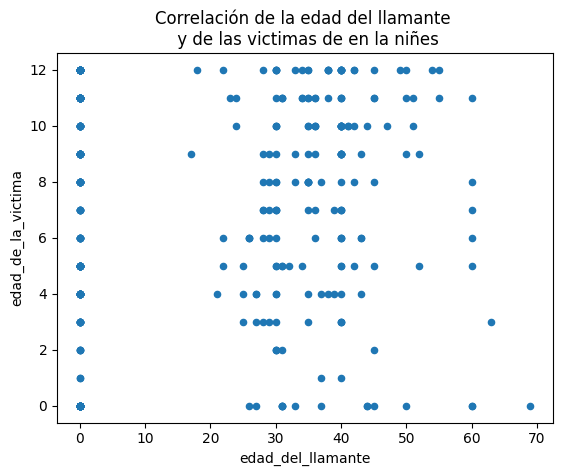

In [4]:
df_victimas_en_la_ninies.plot(kind="scatter", x="edad_del_llamante", y="edad_de_la_victima")
plt.title("Correlación de la edad del llamante \n y de las victimas de en la niñes")
plt.show()

Cómo muestra la gráfica tenemos víctimas en todas las edades incluidas desde los 1 a los 12 años. El valor 0 en el eje X representa que no conocemos la edad del llamante y en el eje Y que no conocemos la edad de la víctima por lo cual el punto 0, 0 y todo punto de Y = 0 no podemos asegurar que la víctima se encuentre en la niñiez pero sí para los puntos Y > 0 y X = 0 porqué en estos casos la edad desconocida no representa a la víctima.
A partir del gráfico podemos deducir que las personas que más llaman por este delito se comprenden aproximadamente entre las edades de 25 a 55 años.


Ahora procedemos a hacer el mismo gráfico para las víctimas adolescentes.

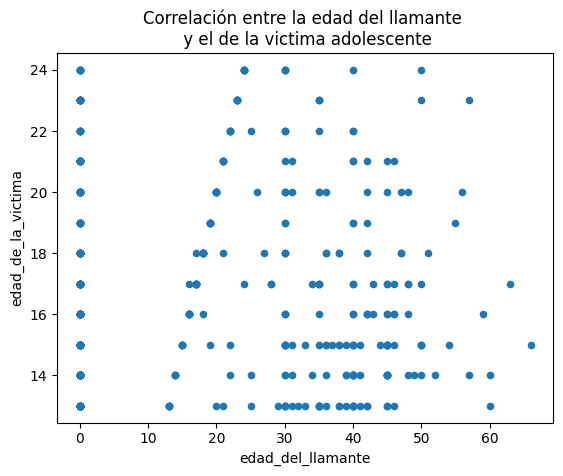

In [5]:
df_victimas_adolescentes.plot(kind="scatter", x="edad_del_llamante", y="edad_de_la_victima")
plt.title("Correlación entre la edad del llamante \n y el de la victima adolescente")
plt.show()

Ahora Notamos que la edad del llamante esta más repartida en la muestra. Y podemos notar que el llamante siempre es de la misma edad o es mayor que la víctima.  

Ahora procedemos a trabajar con menos campos en el dataframe y a asignarles valores a los lugares donde fueron los hechos con el fín de poder segmentarlos como tambien así lo haremos con los casos judicializados.

In [6]:
df_victimas_en_la_ninies_segmento =df_victimas_en_la_ninies[["edad_del_llamante","edad_de_la_victima","llamado_region","llamante_vinculo","vs_grooming","vs_obligacion_sacarse_fotos_pornograficas","hecho_lugar","caso_judicializado"]]
df_victimas_en_la_ninies_segmento = df_victimas_en_la_ninies_segmento[df_victimas_en_la_ninies_segmento['vs_obligacion_sacarse_fotos_pornograficas'] == "SI"]

print(df_victimas_en_la_ninies_segmento.head())
#Creamos nuevo campo y damos valor a los datos para poder agruparlos.
df_victimas_en_la_ninies_segmento["lugar"]= df_victimas_en_la_ninies_segmento["hecho_lugar"].apply(valor_lugar)
df_victimas_en_la_ninies_segmento["hecho_juzgado"]=df_victimas_en_la_ninies_segmento["caso_judicializado"].apply(valor_judicial)
#imprimimos para corroborar los cambios.
print(df_victimas_en_la_ninies_segmento[["edad_de_la_victima","llamante_vinculo","hecho_lugar","lugar","hecho_juzgado","caso_judicializado"]])

print(df_victimas_en_la_ninies_segmento.describe())

     edad_del_llamante  edad_de_la_victima llamado_region llamante_vinculo  \
458                 40                  10  Metropolitana            Madre   
628                  0                   0       Pampeana            NS/NC   
659                 26                   6      Patagonia            Madre   
851                 35                   8  Metropolitana        Comisaría   
933                 44                   0  Metropolitana           Otra/o   

    vs_grooming vs_obligacion_sacarse_fotos_pornograficas  \
458          SI                                        SI   
628          NO                                        SI   
659          NO                                        SI   
851          NO                                        SI   
933          NO                                        SI   

                hecho_lugar caso_judicializado  
458          Redes Sociales                 NO  
628          Redes Sociales              NS/NC  
659  Vivienda de 

Ahora que poseemos los campos para segmentar comenzamos a explorar estos datos para poder vizualizarlos.

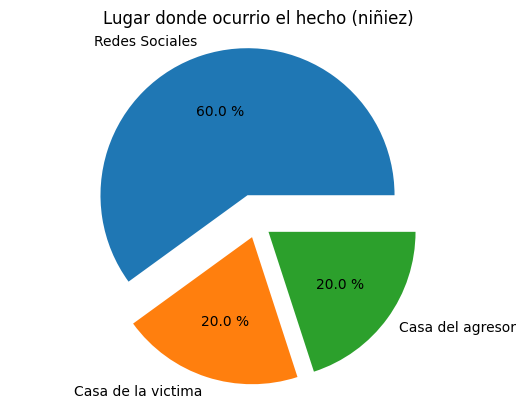

In [8]:
eti=["Redes Sociales","Casa de la victima","Casa del agresor"]
#segmentamos por lugar del hecho
lugar_hecho = df_victimas_en_la_ninies_segmento["lugar"]
redes = 0
victima = 0
agresor = 0
for hecho in lugar_hecho :
    if hecho == 1 :
        redes+=1
    elif hecho == 2 :
        victima+=1
    else:
        agresor+=1
conteo_lugar_hecho =[redes, victima, agresor]
#uso el parametro explode=() para resaltar el lugar donde ocurre
plt.pie(conteo_lugar_hecho,labels=eti, autopct="%0.1f %%", explode=(0.2,0.1,0.1))
plt.axis("equal")
plt.title("Lugar donde ocurrio el hecho (niñiez)")
plt.show()

Con el gráfico anterior podemos apreciar que el 60 % de estos casos ocurren en las redes sociales. Mientras que en la casa de la victima y en la casa del agresor ocurren en un 20 % de los casos.


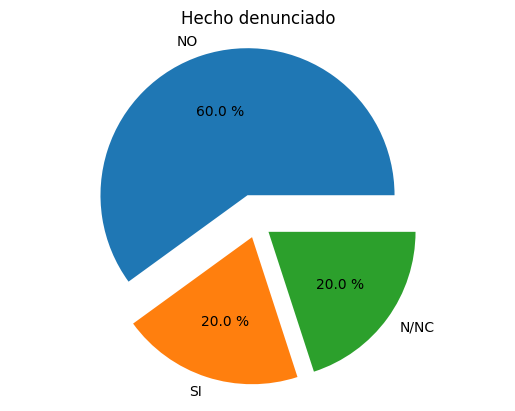

In [9]:
# segmentamos para saver si el hecho fue denunciado.
hecho_denunciado = df_victimas_en_la_ninies_segmento["hecho_juzgado"]
si = 0
no = 0
nc = 0
for hecho in hecho_denunciado :
    if hecho == 1 :
        no+=1
    elif hecho == 2 :
        si+=1
    else:
        nc+=1
conteo_hecho =[no,si,nc]
etiqueta =["NO","SI","N/NC"]
# uso explode=(0.2,0.1,0.1) para resaltar que el hecho no fue denunciado.
plt.pie(conteo_lugar_hecho,labels=etiqueta, autopct="%0.1f %%", explode=(0.2,0.1,0.1))
plt.axis("equal")
plt.title("Hecho denunciado")
plt.show()

Como podemos observar, solo en un 20 % de estos casos podemos asegurar que el hecho fue judicializado, mientras que en un 60 % el hecho no lo es cuando la víctima se encuentra en la niñiez.

Procedemos a hacer la misma segementación para los casos donde la víctima es adolescente.


In [10]:
# comenzamos la misma segmentacion para adolescentes
df_victimas_adolescentes_segmento =df_victimas_adolescentes[["edad_del_llamante","edad_de_la_victima","llamado_region","llamante_vinculo","vs_grooming","vs_obligacion_sacarse_fotos_pornograficas","hecho_lugar","caso_judicializado"]]
df_victimas_adolescentes_segmento = df_victimas_adolescentes_segmento[df_victimas_adolescentes_segmento['vs_obligacion_sacarse_fotos_pornograficas'] == "SI"]
df_victimas_adolescentes_segmento["lugar"]= df_victimas_adolescentes_segmento["hecho_lugar"].apply(valor_lugar)
df_victimas_adolescentes_segmento["hecho_juzgado"]= df_victimas_adolescentes_segmento["caso_judicializado"].apply(valor_judicial)

print(df_victimas_adolescentes_segmento.describe())

       edad_del_llamante  edad_de_la_victima     lugar  hecho_juzgado
count           2.000000            2.000000  2.000000       2.000000
mean           20.000000           18.000000  1.500000       1.500000
std            28.284271            5.656854  0.707107       0.707107
min             0.000000           14.000000  1.000000       1.000000
25%            10.000000           16.000000  1.250000       1.250000
50%            20.000000           18.000000  1.500000       1.500000
75%            30.000000           20.000000  1.750000       1.750000
max            40.000000           22.000000  2.000000       2.000000


Ahora que poseemos los campos para segmentar comenzamos a explorar estos datos para poder vizualizarlos.

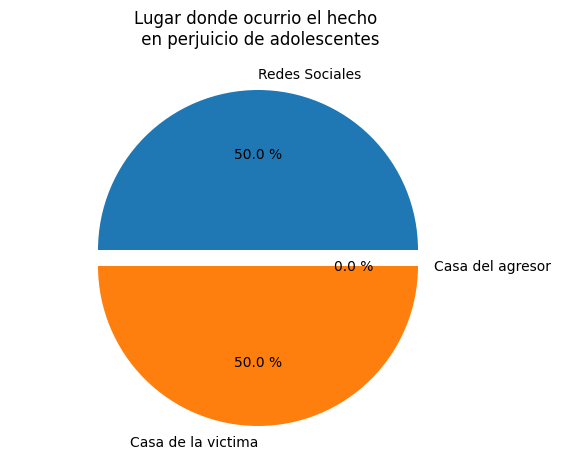

In [13]:
eti=["Redes Sociales","Casa de la victima","Casa del agresor"]
#segmentamos por lugar del hecho
lugar_hecho = df_victimas_adolescentes_segmento["lugar"]
redes = 0
victima = 0
agresor = 0
for hecho in lugar_hecho :
    if hecho == 1 :
        redes+=1
    elif hecho == 2 :
        victima+=1
    else:
        agresor+=1
conteo_lugar_hecho =[redes, victima, agresor]
#uso el parametro explode=(0.1,0,0) para resaltar el lugar donde ocurre
#No se registro que el delito informado haya ocurrido en la casa del agresor pero se deja el código para su observacion.
plt.pie(conteo_lugar_hecho,labels=eti, autopct="%0.1f %%", explode=(0.1,0,0))
plt.axis("equal")
plt.title("Lugar donde ocurrio el hecho \n en perjuicio de adolescentes\n")
plt.show()

En estos casos un 50 % ocurre en redes sociales y otro 50 % en la casa de la victima.

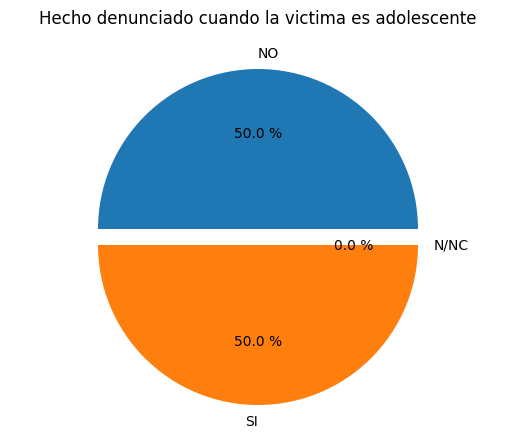

In [15]:
# segmentamos para saver si el hecho fue denunciado.
hecho_denunciado = df_victimas_adolescentes_segmento["hecho_juzgado"]
si = 0
no = 0
nc = 0
for hecho in hecho_denunciado :
    if hecho == 1 :
        no+=1
    elif hecho == 2 :
        si+=1
    else:
        nc+=1
conteo_hecho =[no,si,nc]
etiqueta =["NO","SI","N/NC"]
# uso explode=(0.1,0,0) para resaltar que el hecho no fue denunciado.
# Siempre se observo una respuesta por lo que N/NC esta en 0%
plt.pie(conteo_lugar_hecho,labels=etiqueta, autopct="%0.1f %%", explode=(0.1,0,0))
plt.axis("equal")
plt.title("Hecho denunciado cuando la victima es adolescente\n")
plt.show()

Como podemos observar cuando la víctima es adolescente el hecho se denuncia en un 50 %. un 30 % más que cuando la se encuentra en la niñiez.


#Recomendación final :
##Dado que, según estos datos, cuando una víctima que se ve obligada en su niñiez a tomarse fotos pornográficas el hecho solo se judicializa en un 20 % de los casos. Es necesario crear campañias de conscientización sobre los riesgos y daños que esto puede llegar a implicar y que implica sobre la niñiez actual como así tambien a las venideras.       
